# Titanic Exam




## Getting Started


In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sb


# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)
print(full_data.shape)

# Print the first few entries of the RMS Titanic data
display(full_data.head())
print()
display(full_data.isnull().sum())

Matplotlib is building the font cache; this may take a moment.


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning and Preprocessing

In [3]:
# Make copy of data then deal with NANs
modified_data = full_data
print()
display(modified_data.head())
modified_data['Age'].fillna(full_data['Age'].mean() , inplace=True)
print()
display(modified_data.isnull().sum())

print()
modified_data.drop(['Ticket' ,'Fare','Cabin' ,'Embarked'],axis = 1,inplace = True)
display(modified_data.head())
print()
display(modified_data.isnull().sum())

# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = modified_data['Survived']
ml_modified_data = modified_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(ml_modified_data.head())
print(type(outcomes))



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\mazen\AppData\Local\Temp\ipykernel_4120\546072614.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  modified_data['Age'].fillna(full_data['Age'].mean() , inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0


<class 'pandas.core.series.Series'>


## Defining the accuracy test

In [4]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """

    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred):

        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of "+str((truth == pred).mean()*100)+" %"

    else:
        return "Number of predictions does not match number of outcomes!"


predictions = pd.Series(np.ones(5, dtype = int))#fake pred
output = accuracy_score(outcomes[:5], predictions)
print(output)

Predictions have an accuracy of 60.0 %




## Making Predictions


In [5]:
def predictions_0(ml_modified_data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for i in range(ml_modified_data.shape[0]):#len of rows

        # Predict the survival of 'passenger'
        predictions.append(0)

    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(ml_modified_data)

In [6]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.61616161616161 %


## Sex and Survival Rate


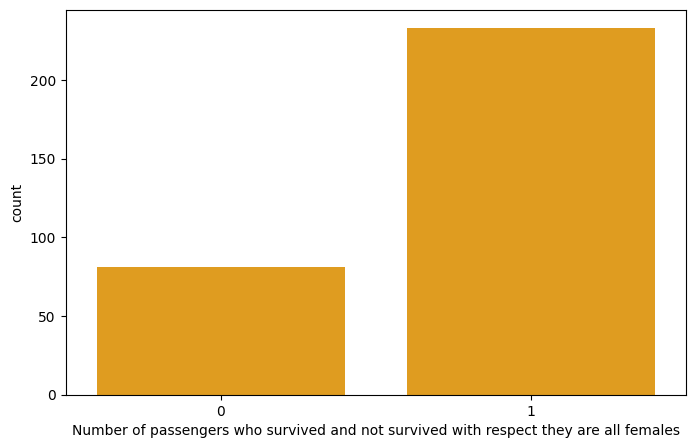

In [7]:
#to do:  find a relationship between feature "sex" and  survival rate
female_data = modified_data[modified_data["Sex"] == "female"]
plt.figure(figsize = [8, 5]);
sb.countplot(data=female_data, x='Survived' , color='orange');
plt.xlabel("Number of passengers who survived and not survived with respect they are all females");


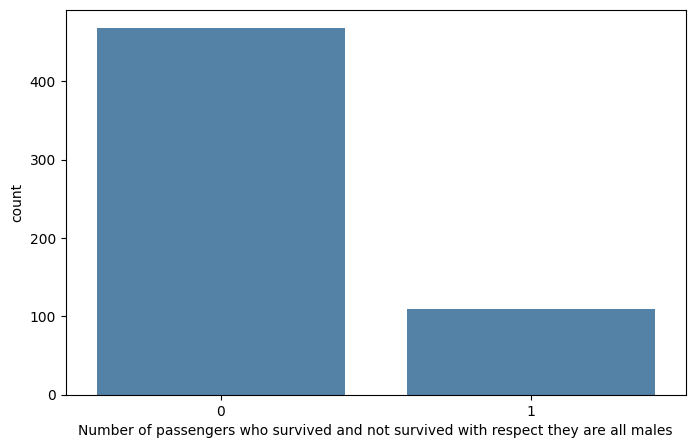

In [8]:
male_data = modified_data[modified_data["Sex"] == "male"]
plt.figure(figsize = [8, 5]);
sb.countplot(data=male_data,x='Survived' , color='steelblue');
plt.xlabel("Number of passengers who survived and not survived with respect they are all males");

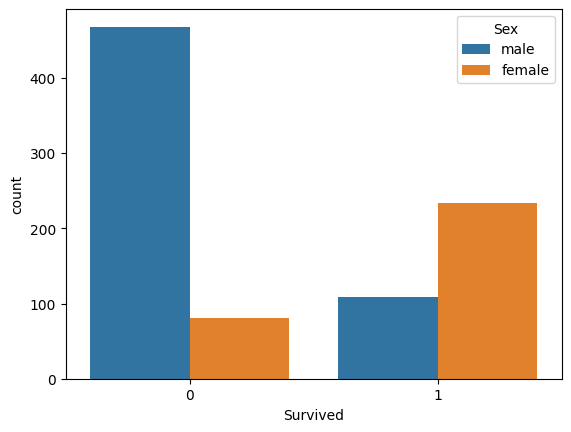

In [9]:
sb.countplot(data=modified_data,x='Survived',hue="Sex");

In [10]:
def predictions_1(ml_modified_data):
    """ Model with one feature:
            - Predict a passenger survived if they are female. """

    predictions = []
    for i in range(0,ml_modified_data.shape[0]):#i represet index for every row

        # Remove the 'pass' statement below
        # and write your prediction conditions here
        if ml_modified_data.loc[i,"Sex"]=="female" :
            predictions.append(1)
        else:
            predictions.append(0)

    # Return our predictions
    return predictions

# Make the predictions
predictions11 = predictions_1(ml_modified_data)

In [11]:
print(accuracy_score(outcomes, predictions11))

Predictions have an accuracy of 78.67564534231201 %


## All Men have died ?

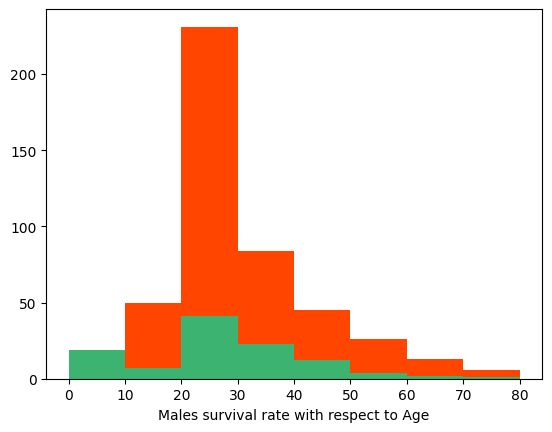

In [12]:

male_data_nsurv = modified_data[(modified_data["Sex"] == "male") & (modified_data["Survived"] == 0)] # red
male_data_surv = modified_data[(modified_data["Sex"] == "male") & (modified_data["Survived"] == 1)]  # blue
bins=np.arange(0,modified_data['Age'].max()+10,10)
plt.hist(data=male_data_nsurv,x='Age',bins=bins,color="orangered")
plt.hist(data=male_data_surv,x='Age',bins=bins,color="mediumseagreen")
plt.xlabel("Males survival rate with respect to Age");

In [13]:
def predictions_2(ml_modified_data):
    """ Model with two features:
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """

    predictions = []
    for i,passenger in ml_modified_data.iterrows():

        # Remove the 'pass' statement below
        # and write your prediction conditions here
        if (ml_modified_data.loc[i,"Sex"]=="female") or (ml_modified_data.loc[i,"Sex"]=="male" and ml_modified_data.loc[i,"Age"]<10)   :
            predictions.append(1)
        else:
            predictions.append(0)


    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(ml_modified_data)


In [14]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.34904601571269 %


## Will no. of parches affect females survival rate ?

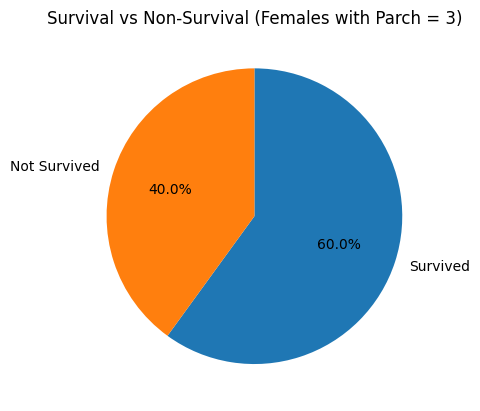

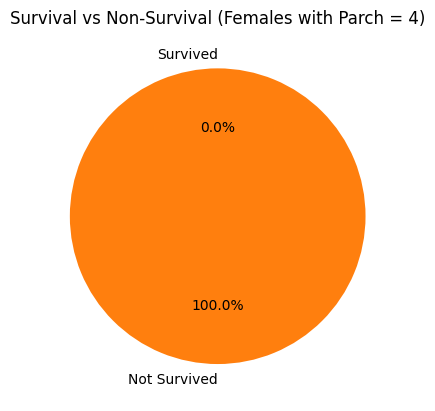

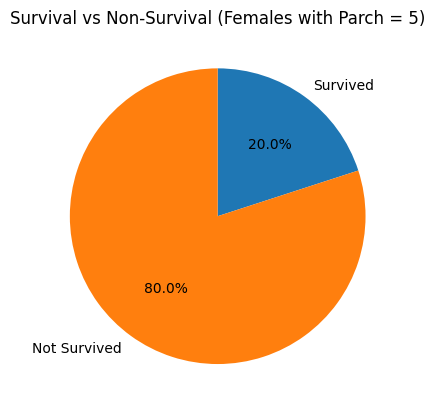

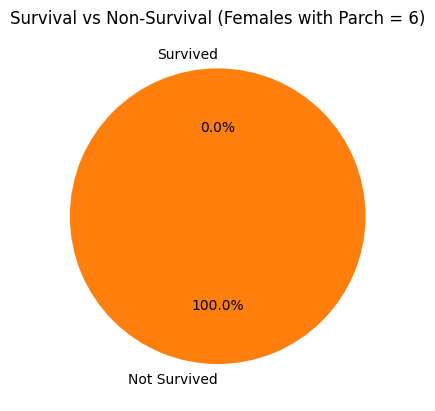

In [15]:
#Graph a chart for survival and not survival  with respect they are females and no of Parch ==3
for i in range(3,7) :
    parch_sur = len(modified_data[(modified_data['Parch'] == i) & (modified_data['Survived'] == 1) ])
    parch_nsur = len(modified_data[(modified_data['Parch'] == i) & (modified_data['Survived'] == 0) ])
    plt.pie([parch_sur , parch_nsur] ,  labels = ['Survived' , 'Not Survived'] , startangle = 90 ,counterclock = False,autopct='%1.1f%%');
    plt.title('Survival vs Non-Survival (Females with Parch = ' +str(i)+ ')')
    plt.show()


## Does passenger class play role in men survival rate ?

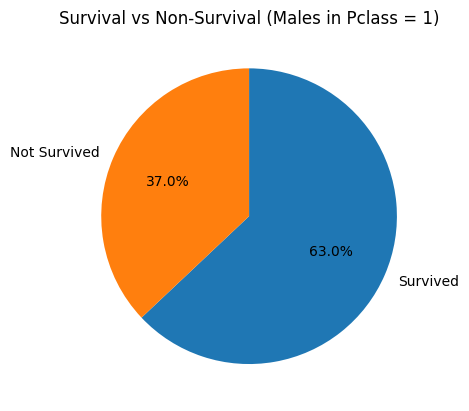

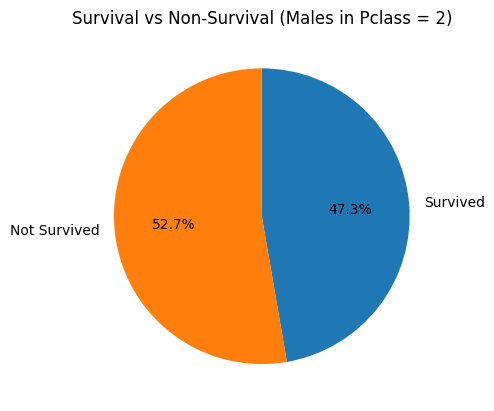

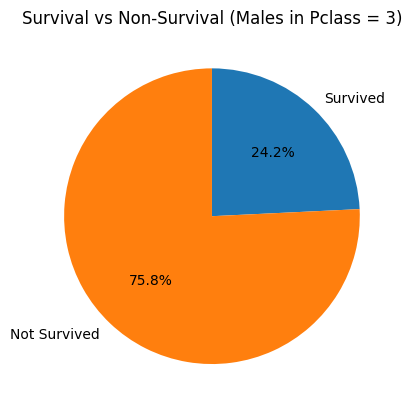

In [16]:
#Graph a chart for survival and not survival  with respect they are males and Pclass ==1
for i in range(1,4) :
    class_sur = len(modified_data[(modified_data['Pclass'] == i) & (modified_data['Survived'] == 1) ])
    class_nsur = len(modified_data[(modified_data['Pclass'] == i) & (modified_data['Survived'] == 0) ])
    plt.pie([class_sur , class_nsur] ,  labels = ['Survived' , 'Not Survived'] , startangle = 90 ,counterclock = False,autopct='%1.1f%%');
    plt.title('Survival vs Non-Survival (Males in Pclass = ' +str(i)+ ')')
    plt.show()


## What is the age of men survived in first class ?

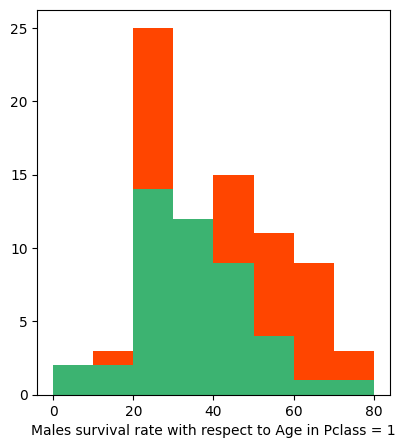

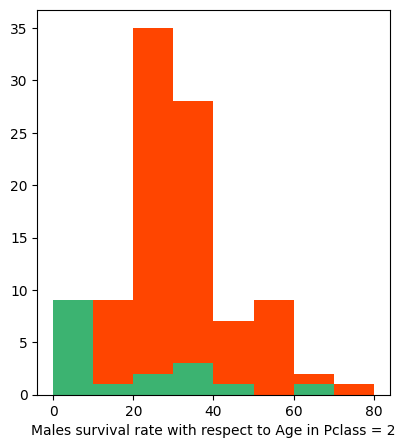

In [17]:

for i in range(1,3):
    plt.figure(figsize = [10, 5])
    plt.subplot(1, 2, i)
    male_data_nsurv_class = modified_data[(modified_data["Sex"] == "male") & (modified_data["Survived"] == 0) & (modified_data["Pclass"] == i)]  # ornage
    male_data_surv_class = modified_data[(modified_data["Sex"] == "male") & (modified_data["Survived"] == 1) & (modified_data["Pclass"] == i)]  # green
    bins=np.arange(0,modified_data['Age'].max()+10,10)
    plt.hist(data=male_data_nsurv_class,x='Age',bins=bins,color="orangered")
    plt.hist(data=male_data_surv_class,x='Age',bins=bins,color="mediumseagreen")
    plt.xlabel("Males survival rate with respect to Age in Pclass = "+str(i));

# Can estimate that only males in first class between 30 and 40 have survived

In [18]:
def predictions_3(ml_modified_data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """

    predictions = []
    for i, passenger in ml_modified_data.iterrows():
        if (ml_modified_data.loc[i,"Sex"]=="female" and ml_modified_data.loc[i,"Parch"] < 3  ) or (ml_modified_data.loc[i,"Sex"]=="male" and ml_modified_data.loc[i,"Age"]<10) or (ml_modified_data.loc[i,"Sex"]=="male" and (30 < ml_modified_data.loc[i,"Age"]<40) and ml_modified_data.loc[i,"Pclass"]==1)   :
            predictions.append(1)
        else:
            predictions.append(0)


    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions3 = predictions_3(ml_modified_data)

In [19]:
print(accuracy_score(outcomes, predictions3))

Predictions have an accuracy of 79.91021324354658 %


## Does no. of siblings affect females survival rate ?

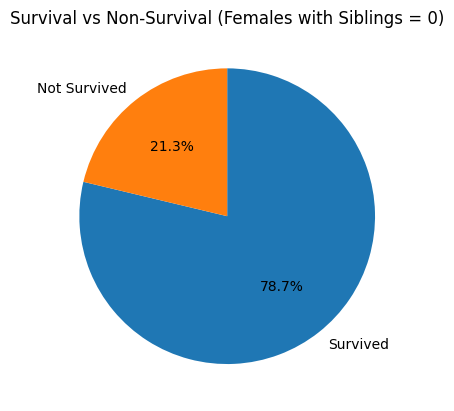

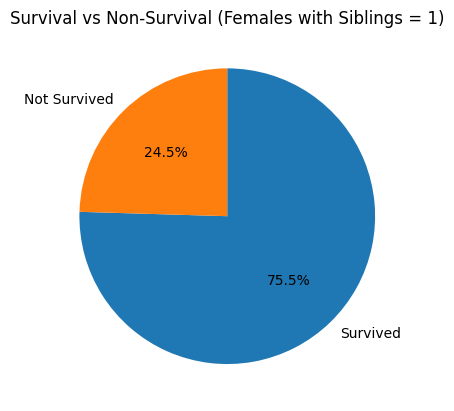

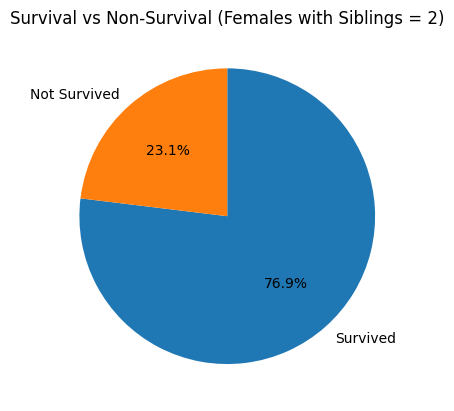

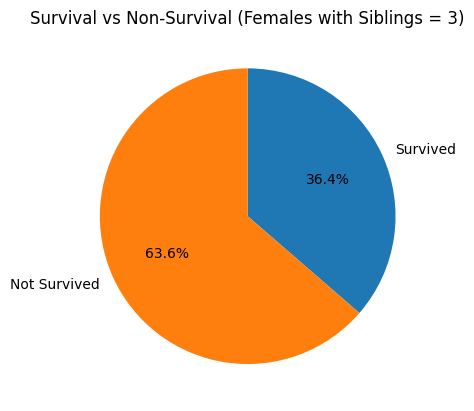

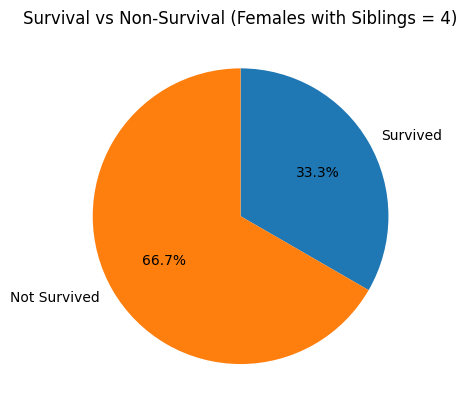

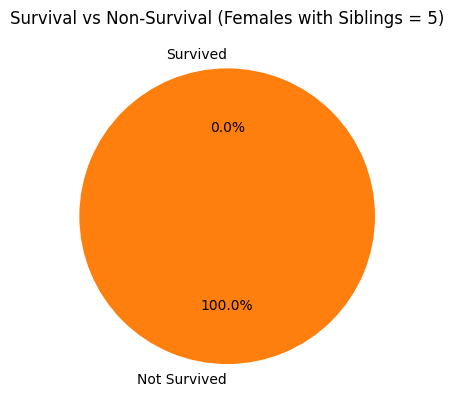

In [20]:
for i in range(0,6) :
    sib_sur = len(modified_data[(modified_data['SibSp'] == i) & (modified_data['Survived'] == 1) & (modified_data["Sex"] == "female") ])
    sib_nsur = len(modified_data[(modified_data['SibSp'] == i) & (modified_data['Survived'] == 0) & (modified_data["Sex"] == "female") ])
    plt.pie([sib_sur , sib_nsur] ,  labels = ['Survived' , 'Not Survived'] , startangle = 90 ,counterclock = False,autopct='%1.1f%%');
    plt.title('Survival vs Non-Survival (Females with Siblings = ' +str(i)+ ')')
    plt.show()
# Females with siblings >= 3 hasn't survived

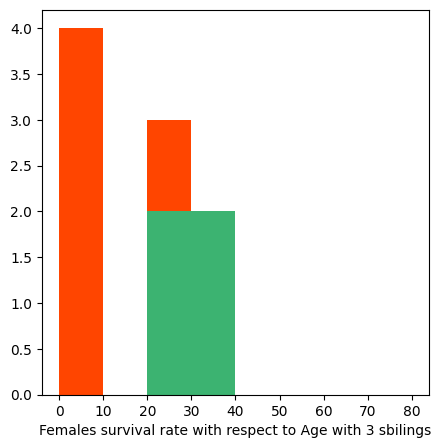

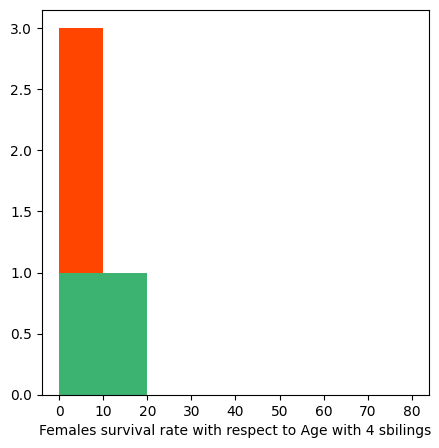

In [21]:
for i in range(3,5):
    plt.figure(figsize = [5, 5])
    female_sib_nsurv = modified_data[(modified_data["Sex"] == "female") & (modified_data["Survived"] == 0) & (modified_data["SibSp"] == i)]  # ornage
    female_sib_surv = modified_data[(modified_data["Sex"] == "female") & (modified_data["Survived"] == 1) & (modified_data["SibSp"] == i)]  # green
    bins=np.arange(0,modified_data['Age'].max()+10,10)
    plt.hist(data=female_sib_nsurv ,x='Age',bins=bins,color="orangered")
    plt.hist(data=female_sib_surv ,x='Age',bins=bins,color="mediumseagreen")
    plt.xlabel("Females survival rate with respect to Age with "+str(i)+" sbilings");

In [22]:
def predictions_4(ml_modified_data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """

    predictions = []
    for i, passenger in ml_modified_data.iterrows():
        if (((ml_modified_data.loc[i,"Sex"]=="female") and (ml_modified_data.loc[i,"Parch"] <= 3) and (ml_modified_data.loc[i,"SibSp"] < 3) ) or ((ml_modified_data.loc[i,"Sex"]=="male") and (ml_modified_data.loc[i,"Age"]<10)) or ((ml_modified_data.loc[i,"Sex"]=="male") and (30 < ml_modified_data.loc[i,"Age"]<40) and (ml_modified_data.loc[i,"Pclass"]==1)) or ((ml_modified_data.loc[i,"Sex"]=="female") and (ml_modified_data.loc[i,"SibSp"] == 3) and (30 <ml_modified_data.loc[i,"Age"]<40)) or ((ml_modified_data.loc[i,"Sex"]=="female") and (ml_modified_data.loc[i,"SibSp"] == 4) and (10 <ml_modified_data.loc[i,"Age"]<20))) :
            predictions.append(1)
        else:
            predictions.append(0)


    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions4 = predictions_4(ml_modified_data)

In [23]:
print(accuracy_score(outcomes, predictions4))

Predictions have an accuracy of 81.25701459034792 %


## Does Pclass affect females survival rate ?

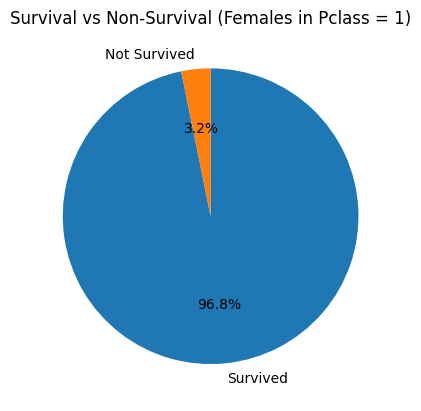

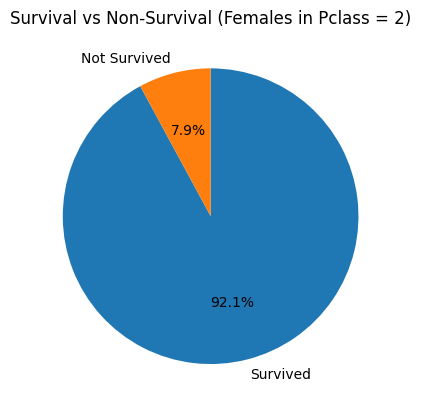

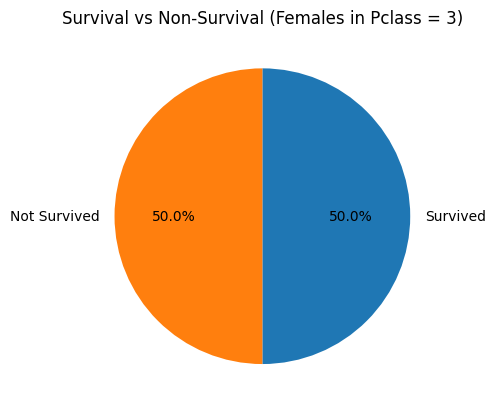

In [24]:
for i in range(1,4) :
    class_female_sur = len(modified_data[(modified_data['Pclass'] == i) & (modified_data['Survived'] == 1) & (modified_data["Sex"] == "female") ])
    class_female_nsur = len(modified_data[(modified_data['Pclass'] == i) & (modified_data['Survived'] == 0) & (modified_data["Sex"] == "female") ])
    plt.pie([class_female_sur , class_female_nsur] ,  labels = ['Survived' , 'Not Survived'] , startangle = 90 ,counterclock = False,autopct='%1.1f%%');
    plt.title('Survival vs Non-Survival (Females in Pclass = ' +str(i)+ ')')
    plt.show()


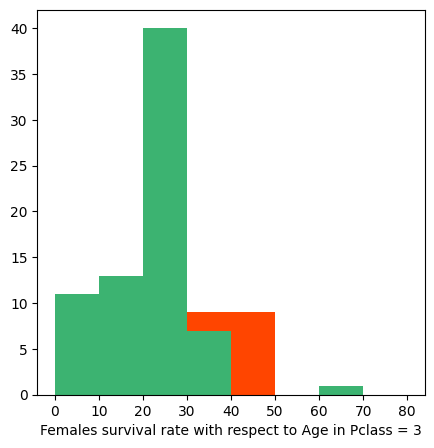

In [25]:
plt.figure(figsize = [5, 5])
class_female_sur = modified_data[(modified_data['Pclass'] == i) & (modified_data['Survived'] == 1) & (modified_data["Sex"] == "female") ]
class_female_nsur = modified_data[(modified_data['Pclass'] == i) & (modified_data['Survived'] == 0) & (modified_data["Sex"] == "female") ]
bins=np.arange(0,modified_data['Age'].max()+10,10)
plt.hist(data=class_female_nsur ,x='Age',bins=bins,color="orangered")
plt.hist(data=class_female_sur ,x='Age',bins=bins,color="mediumseagreen")
plt.xlabel("Females survival rate with respect to Age in Pclass = "+str(i));

In [26]:
def predictions_5(ml_modified_data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """

    predictions = []
    for i, passenger in ml_modified_data.iterrows():
        if ((ml_modified_data.loc[i,"Sex"]=="female") and (ml_modified_data.loc[i,"Pclass"] == 3) and ( 30 <= ml_modified_data.loc[i,"Age"] <= 50) ):
            predictions.append(0)
        elif((ml_modified_data.loc[i,"Sex"]=="female") and (ml_modified_data.loc[i,"Parch"] <= 3) and (ml_modified_data.loc[i,"SibSp"] < 3) ) or ((ml_modified_data.loc[i,"Sex"]=="male") and (ml_modified_data.loc[i,"Age"]<10)) or ((ml_modified_data.loc[i,"Sex"]=="male") and (30 < ml_modified_data.loc[i,"Age"]<40) and (ml_modified_data.loc[i,"Pclass"]==1)) or ((ml_modified_data.loc[i,"Sex"]=="female") and (ml_modified_data.loc[i,"SibSp"] == 3) and (30 <=ml_modified_data.loc[i,"Age"]<=40)) or ((ml_modified_data.loc[i,"Sex"]=="female") and (ml_modified_data.loc[i,"SibSp"] == 4) and (10 <ml_modified_data.loc[i,"Age"]<20)) :
            predictions.append(1)
        else:
            predictions.append(0)


    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions5 = predictions_5(ml_modified_data)

In [27]:
print(accuracy_score(outcomes, predictions5))

Predictions have an accuracy of 82.15488215488216 %
